<img src="pics/logo.png">

Made by **Balázs Nagy**, **Márk Domonkos**

[<img src="pics/open_button.png">](https://colab.research.google.com/github/Fortuz/edu_MethodsAndTools/blob/main/practices/P08/LogisticRegression.ipynb)

# Logistic regresion
### Admission to a University:

In this exercise, we will use logistic regression to predict the admission of a given student to the university.

Suppose that we are university administrators and we want to determine the probability of a given applicant to be admitted successfully based on the results of two admission tests. We have at our disposal the results so far, labelled as to whether the student's application was successful or not.

We can use this dataset for our logistic regression.

### 1: Data aquisition (and package imports)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data3.txt', header = None).to_numpy()          # data aquisition + convert to numpy array
X = data[:,0:2]                                                    # data sorting: X
m,n = X.shape                                                      # m = num. of samples / n = num. of features
Y = data[:,2].reshape(m,1)                                         # data sorting: Y
del data                                                           # deleting non-used variables
X_original = X.copy()                                              # making a copy of X     

print(('X: {}\nY: {}\nNum. of samples: {}\nNum. of features: {}').format(X.shape, Y.shape, m, n))      # print the dimensions and m;n

X: (100, 2)
Y: (100, 1)
Num. of samples: 100
Num. of features: 2


### 2: Plotting our data

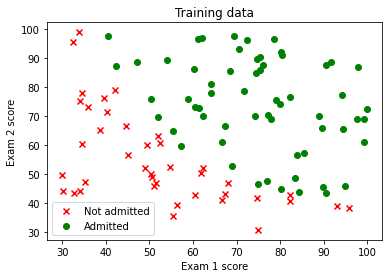

In [2]:
def plotData(X,Y):
    pos=[]                                                  # Admit - 1
    neg=[]                                                  # Denied - 0

    for i in range(0,Y.size):                               # based on Y vactor we sort the rows of X 
        if Y[i] ==0:                                        # if Y[row] == 0 then X[row] --> neg; 
            neg.append(X[i,:])
        elif Y[i] ==1:                                      # if Y[row] == 1 then X[row] --> pos; 
            pos.append(X[i,:])

    neg = np.array(neg)                                     # neg to NumPy array
    pos = np.array(pos)                                     # pos to NumPy array

    plt.scatter(neg[:,0],neg[:,1],marker='x',c="r", label="Not admitted")   # plotting denied with red crosses
    plt.scatter(pos[:,0],pos[:,1],marker='o',c="g", label="Admitted")       # plotting admitted with green circles
    plt.title("Training data")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(loc='lower left')
    plt.show()

    return pos, neg                                          # returning the two array

pos,neg=plotData(X,Y)

It can bee seen that the data are with a good estimate (minimal error) linearly (with a straight line) separable.

### 3: Data  preparation
##### Data normalization:
If the data are within an order of magnitude, normalisation is not strictly necessary, but it can be done.

(then we add the BIAS so the intersection with the axis will still be in our hypothesis)

In [4]:
def featureNormalization(X):
#######################################    
    mean = np.mean(X,axis=0)                               # means of the columns of X
    std = np.std(X, axis=0, ddof=1)                        # standard deviation of the columns of X (ddof = 1)                                        

    X_norm = (X - mean) / std                              
#######################################
    return X_norm, mean, std                                 

X, mean, std = featureNormalization(X_original)            # normalization

In [5]:
if (X.shape[1] == 2):                                   # only add bias when it is needed (don't add bias multiple times)  
#######################################                 # don't forget the indentation (because the if)
    X = np.column_stack((np.ones((m,1)),X))             # bias
#######################################
print(('dim. of X: {}\nX:\n{}').format(X.shape, X))     # for checking print the dimensions + X

dim. of X: (100, 3)
X:
[[ 1.         -1.59421626  0.63514139]
 [ 1.         -1.81710142 -1.20148852]
 [ 1.         -1.53132516  0.35948329]
 [ 1.         -0.28068724  1.08092281]
 [ 1.          0.68806193  0.49090485]
 [ 1.         -1.05667395 -0.53305397]
 [ 1.         -0.23319754  1.62997263]
 [ 1.          0.48208266 -1.05839822]
 [ 1.          0.53727995  1.14076409]
 [ 1.          0.96558389 -1.22094762]
 [ 1.          1.55293123 -1.50659457]
 [ 1.          0.48151286 -1.91675998]
 [ 1.          0.85633616  0.5521221 ]
 [ 1.          0.19119499  1.69493955]
 [ 1.         -1.34164029  0.528167  ]
 [ 1.         -0.59991204  1.23691656]
 [ 1.          0.17606285 -0.72548489]
 [ 1.          0.11833462 -1.05169521]
 [ 1.          0.25784655  1.43709044]
 [ 1.          0.58250489 -1.00340376]
 [ 1.          0.08879298 -1.25834541]
 [ 1.          1.23508208 -0.02274321]
 [ 1.         -0.77650905 -0.93453099]
 [ 1.         -1.61536921 -1.18456258]
 [ 1.          0.63108629  0.14800592]
 [

## 5: The model:

Since we are facing a classification problem, our linear regression model will not be fully adequate. Let's look at a simple example. We are trying to decide whether a tumour is lethal or not based on tumour size.

<img src="Pics/L03_Tumor.png" width="400">

Using the method introduced so far and the

$ h_w(x)=XW $ 

hypothesis is used to fit a line. However, our line exceeds the bounded [0,1] set and is not precise enough. By defining a limit for our fitted line, let it be 0.5, we can decide what our prediction will be.

If $h_w(x)\geq 0.5$, then "y=1", this way it is malign. <br>
If $h_w(x)< 0.5$, then "y=0", this way it is beningn.  <br>

However, our prediction may fall below 0 or above 1, which is unnecessary. It would be better to find a bounded hypothesis function that satisfies the following criterion:

$0\leq h_w(x) \leq 1$

Let us introduce the sigmoid function, which satisfies this criterion of being bounded on [0,1].

Sigmoid:

$ g(z) = \frac{1}{1+e^{-z}} $

<img src= "Pics/L03_sigmoid.png" width=450>

Using the sigmoid function, we effectively assign a probability to each sample that the tumour size is malign or not. 

$h_w(x)=P(y=1|X, W)$

And we can extend our hypothesis as follows: <br>

$ h_w(x) = g(XW) $ <br>

where $ g(XW) = \frac{1}{1+e^{-XW}} $

$g(XW)\geq0.5$ <br>

then, if $WX\geq0$

Let's look at two simple examples of classification using a sigmoid function. <br>

#### Linear case:

$ h_w(x)=g(w_01+w_1x_1+w_2x_2) $

$w=[-3\ 1\ 1]$ 

Prediction: $y=1$ if $-3+x_1+x_2\geq0$

$x_1+x_2\geq3$ 

<img src= "Pics/L03_pelda_1.png" width=200>

#### Non-linear case:

$ h_w(x)=g(w_01+w_1x_1+w_2x_2+w_3x_1^2+w_4x_2^2) $ 

$w=[-1\ 0\ 0\ 1\ 1]$ 

Prediction: $y=1$ if $-1+x_1^2+x_2^2\geq0$

$x_1^2+x_2^2\geq1$

<img src= "Pics/L03_pelda_2.png" width=200>

Create the sigmoid function and test the result for -6, 0, 6!

In [6]:
def sigmoid(z):
############################################    
    g = 1/(1 + np.exp(-z))
############################################    
    return g                               

print(('Result for input -6: {}\nResult for input  0: {}\nResult for input  6: {}').format(sigmoid(-6), sigmoid(0), sigmoid(6)))           # teszt -6 -ra
if sigmoid(-6) < 0.01 and sigmoid(0) == 0.5 and sigmoid(6) > 0.99:
    print("\n The function works.")
else:
    print("\n Something went wrong. Correction is needed!")

Result for input -6: 0.0024726231566347743
Result for input  0: 0.5
Result for input  6: 0.9975273768433653

 The function works.


### 6 Cost function:

Since we have changed our hypothesis function, we need to change the cost function we have been using to adapt it to the task. The MSE introduced in our previous examples provided a reasonably smooth convergence, with our modified hypothesis it is not the best choice for solving classification problems as it will result in a non-convex function with many local mininmum points. The question is, can we find a cost function that can define a convex cost function in classification problems? On a convex function, our gradient method is much less likely to get stuck at a local minimum.

<img src="Pics/L03_Costfunction.png" width=600>


Let:

$ C(w) = {-log(h_w(x)),\   if\ y=1} $ 

$ C(w) = {-log(1-h_w(x)),\ if\ y=0} $

<img src="Pics/L03_LogCost.png" width=300>

So we use the following relation as the cost function:

$ C(w) = \frac{1}{m} \sum{-y^i\cdot\log(h_w(x^i))-(1-y^i)\cdot\log(1-h_w(x^i))} $


### 7: Gradient Descent Algorithm
Our aim remains to minimise the cost function. Gradient reduction is still a suitable way for the tuning of the weights by using the derivative of the cost function.

$w_j:=w_j-\mu\frac{\partial}{\partial w_j}C(w)$ 

The partial derivative of the cost function can be calculated in the usual way:

$ \frac{\partial}{\partial w_j}C(w)=\frac{1}{m}\sum_{i=1}^{m}(h_w(x^i)-y^i)\cdot x_j^i $



### costFunction definition:

In [7]:
def costFunction(w,X,Y):
######################################################################
    h = np.array(sigmoid(X@w))                                              # calcutaion of the prediction 
    C = (1/m) * np.sum(((-Y) * np.log(h)) - ((1-Y)*(np.log(1-h))))          # calculation of the cost

    grad = (X.transpose())@(h-Y)/m                                          # calculation of the gradient
######################################################################
    return C, grad                                                          

initial_w = np.zeros(((n+1),1))                                             # initial weights
C1,grad1 = costFunction(initial_w,X,Y)                                      # test 1 with w=[0; 0; 0]

print('''Cost and Gradient  at initial weights (zeros):
Expected cost (approx.): 0.693
Computed:''',C1)
print('''Expected gradient(approx.):
 [[-0.1]
 [-0.28]
 [-0.25]]
Computed:\n''',grad1)

test_w = np.array([[-24], [13], [16]])                                    # test weights w=[-24;0.2;0.2]
C2, grad2 = costFunction(test_w,X,Y)                                      # test 2
print('\nTest weights:',test_w.transpose())
print('''Cost and Gradient  at test weights:
Expected cost (approx.): 7.74
Computed:''',C2)
print('''Expected gradient(approx.):
 [[-0.44]
 [-0.14]
 [-0.06]]
Computed:\n''',grad2)
print('\n')

Cost and Gradient  at initial weights (zeros):
Expected cost (approx.): 0.693
Computed: 0.6931471805599453
Expected gradient(approx.):
 [[-0.1]
 [-0.28]
 [-0.25]]
Computed:
 [[-0.1       ]
 [-0.27981946]
 [-0.24972806]]

Test weights: [[-24  13  16]]
Cost and Gradient  at test weights:
Expected cost (approx.): 7.74
Computed: 7.747803887700628
Expected gradient(approx.):
 [[-0.44]
 [-0.14]
 [-0.06]]
Computed:
 [[-0.44154019]
 [-0.14340547]
 [-0.06486541]]




### 8: Gradiens descent method:

In [8]:
def gradientDescent(X,Y,w,learning_rate,num_iters):
    C_history = []                                      # history of cost function initialization
##################################################
    for i in range(num_iters):                          # loop till the number of epoch is reached 
        C, grad = costFunction(w,X,Y)                   # calculation: Cost function / gradient
        w = w - (learning_rate*grad)                    # setting the new weights
        C_history.append(C)                             # C_history appended with the new values
##################################################
    return w, np.array(C_history)                       # returning with the weights, and the C_history calculated

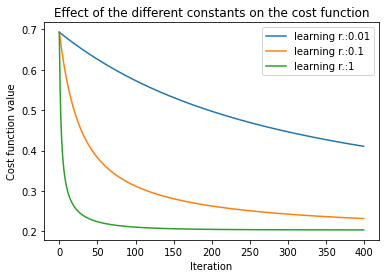

In [9]:
w = np.array([[0],[0],[0]])     # initial weights
epoch = 400

w_a, C_history_a = gradientDescent(X,Y,w,0.01,epoch)                           # calculation with lr: 0.01  
plt.plot(range(C_history_a.size), C_history_a, label= "learning r.:0.01")
                                                       
w_b, C_history_b = gradientDescent(X,Y,w,0.1, epoch)                             
plt.plot(range(C_history_b.size), C_history_b, label= "learning r.:0.1")       # calculation with lr: 0.1  

w, C_history = gradientDescent(X,Y,w,1,epoch)
plt.plot(range(C_history.size), C_history, label= "learning r.:1")              # calculation with lr: 1  

plt.title("Effect of the different constants on the cost function")
plt.xlabel("Iteration")
plt.ylabel("Cost function value")
plt.legend()
plt.show()

The graph above shows how the learning rate affected our results:<br>
When the learning rate $(\mu)$ is chosen to be small, convergence is slow. <br>
As the learning rate $(\mu)$ increases, convergence accelerates.<br>

(Optional: Try a few more values of learning rate!)

In [10]:
print('''The cost function at found weights by the gradient descent alg.:
Expected (approx): 0.203
Computed: %.04f''' % C_history[-1])
print('''Weights expected (approx.):
[1.658 3.883 3.619]
Weights computed: \n''', w.transpose())

The cost function at found weights by the gradient descent alg.:
Expected (approx): 0.203
Computed: 0.2036
Weights expected (approx.):
[1.658 3.883 3.619]
Weights computed: 
 [[1.6582185  3.88371249 3.61890756]]


### 9: Plot the decision boundary

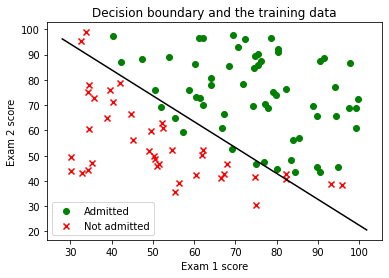

In [11]:
plt.scatter(pos[:,0],pos[:,1],c="g", marker="o",label="Admitted")     # plotting pos with green circles
plt.scatter(neg[:,0],neg[:,1],c="r",marker="x",label="Not admitted")  # plotting neg with red crosses

Exam1_val     = np.array([min(X_original[:, 0])-2, max(X_original[:, 0]+2)]) # two points to print the decision boundary
Exam1_norm = (Exam1_val - mean[0]) / std[0]
Exam2_norm = (-w[0]-w[1]*Exam1_norm)/w[2]                                    # calculate the y coordinates for them
Exam2_val     = (Exam2_norm * std[1]) + mean[1]

plt.plot(Exam1_val,Exam2_val,"k")                                   # plotting the decision boundary
plt.title("Decision boundary and the training data")        
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)
plt.show()

### 10: Prediction
When calculating the prediction, we have to make sure that we perform the same operations on the sample as we did in the data preparation phase before the training. So if we have normalised our data, we must also normalise the new data and add the BIAS. Then we can use our saved weight vector to calculate our prediction.

In [12]:
def predict(X):                                  # prediction function
###########################################    
    X = (X-mean)/std                             # normalization
    X = np.append(np.ones((1)),X)                # bias
    h = sigmoid(X@w)                             # h= sigmoid(Xw)
    if h >= 0.5:
        p = 1
    else:
        p = 0         
###########################################    
    return p, h                                    

NewScore = np.array([45,85])
pred, h =predict(NewScore)            # results for 45 and 85
print('''Expected result of the prediction with [45 , 85] (approx.):
Accepted (1) with 0.767 possibility
Predicted: %.0f with %.4f possibility''' % (pred, h[0]))

Expected result of the prediction with [45 , 85] (approx.):
Accepted (1) with 0.767 possibility
Predicted: 1 with 0.7676 possibility


### 11: Accuracy
Let's examine how our linear model performs when evaluating the original data. Calculate the accuracy of the algorithm. To do this, we can use the predict() function we wrote earlier or we can evaluate all the samples in a batch.

In [13]:
def calculateAccuracy():                                    # accuracy
#######################################
    predictions= (sigmoid(X@w)>0.5)                         # Calculation of predictions for all original X (sigmoid result is >0.5)
    accuracy=(sum(predictions==Y)/m)*100                    # if the calculated prediction is the same as Y then it is correct --> make a precentage from this
#######################################
    return accuracy                                         

print(float(calculateAccuracy()), '% accuracy (approx. 89.0 % expected)')

89.0 % accuracy (approx. 89.0 % expected)


## With sklearn

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression                       

data = pd.read_csv('data3.txt', header = None)       # data aquisition
XX = data.iloc[:, 0:2].values.reshape(-1, 2)            # data sorting: X
YY = data.iloc[:, 2].values.reshape(-1,)                # data sorting: Y

logReg = LogisticRegression().fit(XX,YY)
test = np.array([[45, 85]])                             # one sample (1,2) --> [[]]
pred = logReg.predict(test)                             # prediction
pred_p = logReg.predict_proba(test)                     # test case

print("""Prediction for the approval:""",int(pred),"""
The value of the probability:""",pred_p[0,1])

acc = logReg.score(XX,YY)                               # accuracy
print('Accuracy on the training data:',acc)

Prediction for the approval: 1 
The value of the probability: 0.7752856046030867
Accuracy on the training data: 0.89


# A Nonlinear case
### Microchip Anomaly:

Our task is to determine which of the microchips are defective and which are not based on the measurement results.

In this exercise we will work with a non-linearly separable data set. We want to use logistic regression for classification, so we extend the non-linear case by introducing more features (polynomial regression).

In this exercise we will test different regularization parameters to better understand how regularization (penalty) works and how it can be used to prevent overfitting. Observe the changes in the decision boundary as the lamdba will be changed. With a small lambda you will notice that there is almost no error in the clustering, but in return you get a very complicated curve. This is not a good decision curve, note that later it accepts (-0.25; 1.5), which seems to be an incorrect decision based on our data set.

Using a larger lambda we can see that a simpler decision boundary is created that does not follow the data as closely so it is underfitted.

### 1. Make data usable (and package importing)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data4.txt', header = None).to_numpy()        # data aquisition then conversion to NumPy array
X = data[:,0:2]                                                     # data sorting: X
m,n = X.shape                                                       # num. of samples / num. of features
Y = data[:,2].reshape(m,1)                                          # data sorting: Y
del data                                                            # cleanup

print(('X: {}\nY: {}\nNum. of samples: {}\nNum. of features: {}').format(X.shape, Y.shape, m,n))

X: (118, 2)
Y: (118, 1)
Num. of samples: 118
Num. of features: 2


### 2. Sorting the data  (pos/neg) and plotting it

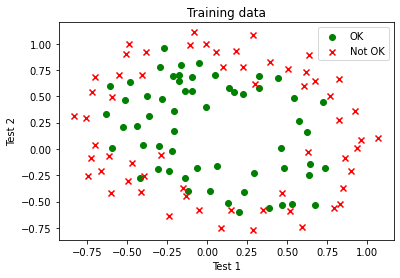

In [16]:
def plotData(X,Y):
    pos = []                                                        # good elements
    neg = []                                                        # bad elements

    for i in range(0,Y.size):                                       # checking Y rows
        if Y[i]==1:                                                 # if Y[row]==1 the X[row]-->pos
            pos.append(X[i,:])
        elif Y[i]==0:                                               # if Y[row]==0 the X[row]-->neg
            neg.append(X[i,:])

    pos = np.array(pos)                                             # pos to NumPy array
    neg = np.array(neg)                                             # neg to NumPy array

    plt.scatter(pos[:, 0], pos[:, 1], c="g", marker="o", label="OK")        # plotting pos
    plt.scatter(neg[:, 0], neg[:, 1], c="r", marker="x", label="Not OK")    # plotting neg
    plt.title("Training data")
    plt.xlabel("Test 1")
    plt.ylabel("Test 2")
    plt.legend()
    plt.show()

    return pos,neg                                                  

pos, neg = plotData(X,Y)                                       

We can see that our data cannot be linearly separated.

Since our data fall within the interval $[-1, 1]$ for both variables with a fairly good distribution, the data set does not require further normalization.

### 3. Fitting

In terms of model fittness for the samples, we can distinguish 3 different cases.

- Underfit (High Bias) is when the model is too simple and therefore causes a large error on both the training data and the test data.

- It is a good fit when we get low error on both the training data and the test data. This means that the learning process has succeeded in learning the relevant information, which allows the new patterns to be classified well enough.

- We speak of overfitting (High Variance) if the model has learned the training patterns specifically during the training. This results in a very low error rate during learning, but a high error rate when classifying samples not included in the training data set. 

<img src="Pics/L04_Fittings.png" width="800">

The Underfit and Overfit phenomena during a typical learning run. The goal would be to stop learning at the point where the validation error is the smallest.

<img src="Pics/L04_BiasVariance.png" width="400">

In practice, we divide our available data into 3 groups (if we have a large enough sample size).
- Training set (~70%): data used during training to set the weights of the moddell
- Validation set (~15%): Stop learning at the appropriate epoch, hyperparameter optimization
- Test set (~15%): Test on independent data, define metrics

In this example, we are working with a small data set, so we will not split the data in this way. The theoretical insight only will help our understanding.

### Methods to deal with Underfit and Overfit cases:

In the case of underfit, our model is too simple. Appropriate compensation could be:
- Increasing the number of variables (features)
- Choosing a more complex model

In case of overfit, our model learns too specifically on the training data. Appropriate compensation could be:
- Less input variables
- Simpler model
- Introduce a penalty (regularization)

In the case of regularisation, the guiding principle is: Starting from a complex model (e.g.: multiple variables), the algorithm has a number of possibilities, thus the underfit phenomenon is most likely handled. And by extending the cost function, we penalize if the model uses too many variables. In this way, we create the optimal condition for the simplest model to solve the problem.

### 4. Extending input

In our Microchip test example, the input variables are the two test results. To solve the desired problem, we need more variables. One possible way to do this is to increase the input variables by the powers of our original variables. 

$x_1,\ x_2 \Rightarrow\ 1,\ x_1,\ x_2,\ x_1^2,\ x_1x_2,\ x_2^2,\ x_1^3,\ x_1^2x_2,\ x_1x_2^2,\ x_2^3$

By expanding our variables up to the 3rd power including the BIAS term, we can count 10 variables instead of the initial 2.

Let's create the mapFeature() function that performs the above mapping. 

In [17]:
def mapFeature(X1,X2,deg=3):                            
#######################################################
    m = X1.size                                         # make the combination --> (X1, X2, X1^2, X1X2, X2^2,..., X2^3)
    out = np.ones((m,1))                                # to a deg-th power (deg is 3 by default)

    for i in range(1,deg+1):
        for j in range(i+1):
            terms = (X1**(i-j)*X2**j).reshape(m,1)     # creation of the combintions
            out = np.column_stack((out,terms))         # putting it to the output matrix
#######################################################            
    return out

deg = 3
X=mapFeature(X[:,0], X[:,1], deg)                           # using the function
print(X.shape)

(118, 10)


Once the input variables have been expanded, we can move on to the construction of the cost function.

### Cost function and the gradient descent

Our activation function will be the sigmoid function, as we have been used to in previous exercises.

The cost function will be augmented with a penalty term according to the following formula:

$ C(w)=\frac{1}{2m}\sum_{i=1}^m(h_w(x^i)-y^i)^2+\lambda\sum_{\color{red}{j=1}}^nw_{\color{red}{j}}^2 $

where
$ \lambda $ penalty rate<br>
$ i $ index of samples starting from 1. $i = 1...n$<br>
$ j $ index of input variables starting from 0. $\color{red}{ j = 0...m}$

What should be noted is that the BIAS is not penalized, i.e. the weight $x_{\color{red}{0}} = 1 $ associated with $ \color{red}{w_0}$ BIAS should not be taken into account when calculating the penalty. 

Choosing the value of $ \lambda$ too high may lead to the case of underfit.  

Let us consider how the cost function with the regularization term extended will evolve in the multivariate case and how it will fit into the gradient method.

$ C(w)=-\frac{1}{m}\sum_{i=1}^{m}y^i\cdot log(h_w(x^i))+(1-y^i)\cdot log(1-h_w(x^i))+\frac{\lambda}{2m}\sum_{j=1}^nw_j^2 $

For ease of derivation, the regularizing term constant $ \lambda$ is replaced by $ \frac{ \lambda}{2m}$.

Basic formula for the weight update of the Gradient Descent method:

$ w_j = w_j - \mu \color{blue}{\frac{\partial}{\partial w_j}C(w)}$

When calculating the derivative of the cost function, the BIAS case must be treated separately. Let us examine it for $w_0$ and $w_1$.

$ \color{blue}{\frac{\partial}{\partial w_0}C(w)}=\frac{1}{m}\sum_{i=1}^{m}(h_w(x^i)-y^i)\cdot x_0^i+{\color{red} 0}$

$ \color{blue}{\frac{\partial}{\partial w_j}C(w)}=\frac{1}{m}\sum_{i=1}^{m}(h_w(x^i)-y^i)\cdot x_j^i+\frac{\lambda}{m}w_j $

Taking advantage of the similarities, consider how the cost function and the gradient could be calculated in a function using matrix operations.

Now lets implement the costFunctionReg() function.

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunctionReg(w,X,Y,Lambda=1):
#######################################################    
    m = len(Y)
    
    h = sigmoid(X@w)                             # activation
    w1 = np.vstack((np.array([0]),w[1:,:]))      # we make zeros for the weights coresponding to the BIAS in a separate vector
    p = Lambda*(w1.transpose() @ w1)/(2*m)       # penalty

    C = (((-Y).transpose() @ np.log(h)) - ((1-Y).transpose() @ np.log(1-h)))/m + p    # cost function

    grad = (X.transpose() @ (h -Y) + Lambda*w1)/m                                     # gradient
#######################################################
    return C,grad

init_w = np.zeros((X.shape[1],1))                   # initial weights (0s)
C, grad =costFunctionReg(init_w,X,Y)                # cost function / gradient
print('Expected cost at initial weight (zeros): 0.693')
print('Calculated cost at initial weight (zeros): %.4f' % C)

Expected cost at initial weight (zeros): 0.693
Calculated cost at initial weight (zeros): 0.6931


After the successful implementation of the cost function and the calculation of the gradients, the weights can be modified.

Gradient Descent algorithm weight modification basic formula:

$w_j:=w_j-\mu\frac{\partial}{\partial w_j}C(w)$ 

Implement the gradientDescent() function. Use costFunctionReg() and save the cost of each epoch within the function.


Regularized weight:
 [[ 3.33899928]
 [ 2.14356838]
 [ 3.6296769 ]
 [-7.78432855]
 [-3.77069998]
 [-6.59156856]
 [-0.56635355]
 [-1.44122833]
 [-1.02476626]
 [-2.52639361]]


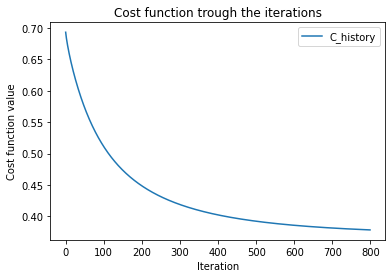

In [19]:
def gradientDescent(X,Y,w,learning_rate,num_iters,Lambda):                         
####################################################    
    C_history = []

    for i in range(num_iters):                                              # run until max epochs
        C, grad = costFunctionReg(w,X,Y,Lambda)
        w = w - (learning_rate*grad)                                        # simultaneous weight update
        C_history = np.append(C_history,C)                                  # saving cost to C_history

    C_history = np.array(C_history)
####################################################    
    return w, C_history

learning_rate = 1
epoch = 800
Lambda = 0.02

w, C_history = gradientDescent(X,Y,init_w,learning_rate,epoch,Lambda)      
print('\nRegularized weight:\n',w)

plt.plot(C_history,label = "C_history")    
plt.title("Cost function trough the iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost function value")
plt.legend()
plt.show()

### 6. Visualization of the decision boundary

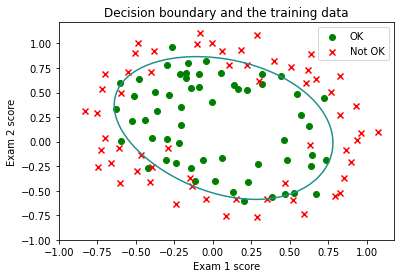

In [20]:
plt.scatter(pos[:, 0], pos[:, 1], c="g", marker="o", label="OK")            # plotting pos
plt.scatter(neg[:, 0], neg[:, 1], c="r", marker="x", label="Not OK")        # plotting neg

u_vals = np.linspace(-1,1.,50)                                              # parameter1 for the boundary plotting
v_vals = np.linspace(-1,1.,50)                                              # parameter2
z=np.zeros((len(u_vals),len(v_vals)))                                       # initialization of the result matrix

for i in range(len(u_vals)):                                                # calculation for each point
    for j in range(len(v_vals)):
        z[i,j] = mapFeature(u_vals[i],v_vals[j],deg) @ w                        

plt.contour(u_vals,v_vals,z.transpose(),0)                                  # plotting the decision boundary
plt.title("Decision boundary and the training data")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)
plt.show()

### 7. Accuracy

In [21]:
def classificationPrediction(w,X):
    pred = (sigmoid(X @ w) > 0.5)
    return ((np.sum(pred==Y)/m)*100)

acc=classificationPrediction(w,X)
print('\nAccuracy of the classification:',acc, '%')


Accuracy of the classification: 83.05084745762711 %


But why didn't we learned about nerual networks yet? We will discuss it in the next lesson.

<div style="text-align: right"> These exercises are using elements from Andrew NG's Machine Learning course.</div>